In [1]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import numpy as np 
from IPython.display import Image, display
import torch
from matplotlib import pyplot as plt
from PIL import Image

import cv2

image_processor = AutoImageProcessor.from_pretrained("hustvl/yolos-tiny")

model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-tiny")

# from https://huggingface.co/docs/transformers/en/model_doc/yolos#transformers.YolosForObjectDetection
# also https://huggingface.co/spaces/mohamedrekik/YOLOv8_Object_Detection/blob/main/app.py

In [2]:


def process(pathos):
    
    image = Image.open(pathos)
    out_image = cv2.imread(pathos)

    inputs = image_processor(images=image, return_tensors="pt")

    outputs = model(**inputs)

    target_sizes = torch.tensor([image.size[::-1]])

    results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[

        0

    ]

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):

        box = [round(i, 2) for i in box.tolist()]
        out_label = model.config.id2label[label.item()]

        x1, y1, x2, y2 = box

        # Calculate the dimensions of the label text
        (label_width, label_height), _ = cv2.getTextSize(out_label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

        # Calculate the position of the label text
        label_x = x1
        label_y = y1 - 10 if y1 - 10 > label_height else y1 + 10

        # Draw a filled rectangle as the background for the label text
        label_x = round(label_x)
        label_y = round(label_y)

        new_image = cv2.rectangle(out_image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)
        
        new_image = cv2.putText(new_image, out_label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255, 255), 1, cv2.LINE_AA)

        # cv2.imshow(new_image)
        plt.axis('off')
        plt.imshow(new_image)




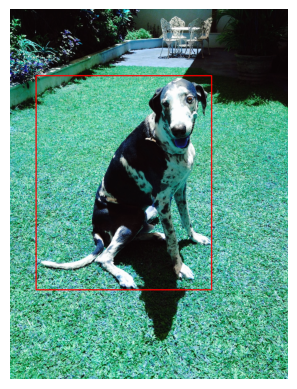

In [3]:

process('data/images/caesar.jpg')